In [10]:
import pandas as pd

In [11]:
csv_file = pd.read_csv("/Users/a90530/Downloads/akbank/dataset/rawData.csv")
df = pd.DataFrame(csv_file)

In [12]:
def veri_inceleme(df):
    print("\nDataframe'in ilk 5 tanesi")
    print(df.head())
    print("\n\nDataframe'in columnları")
    print(df.columns)
    print("\n\nDataframe hakkında istatistiksel bilgi")
    print(df.describe())
    print("\nColumn Sayısı:")
    print(df.shape)
    print("\n\nDataframe hakkındaki bilgileri verir")
    print(df.info())
    print("\n\nDataframe'deki boş girilen hücreleri gösterir")
    print(df.isnull().sum())
veri_inceleme(df)


Dataframe'in ilk 5 tanesi
   id                                              title       postingDate  \
0   1                                     Care Home Cook  07 November 2023   
1   2                                     Care Assistant  07 November 2023   
2   3                        Senior Sister Critical Care  07 November 2023   
3   4  Critical Care Clinical Skills and Learning Fac...  07 November 2023   
4   5                                     Health Visitor  07 November 2023   

                              salary      hours       closingDate  \
0                    £12.50 per hour  Part time  07 December 2023   
1          £10.80 to £11.00 per hour  Part time  07 December 2023   
2  £43,742.00 to £50,056.00 per year  Full time  21 November 2023   
3  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   
4  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   

              location               state  city              company  \
0          Dover

Successfully loaded translations: {'Accounting & Finance Jobs': 'Muhasebe ve Finans', 'Admin Jobs': 'İdari İşler', 'Agriculture, Fishing & Forestry Jobs': 'Tarım, Balıkçılık ve Ormancılık', 'Consultancy Jobs': 'Danışmanlık İşleri', 'Creative & Design Jobs': 'Tasarım', 'Customer Services Jobs': 'Müşteri Hizmetleri', 'Domestic Help & Cleaning Jobs': 'Ev Yardımcılığı ve Temizlik', 'Energy, Oil & Gas Jobs': 'Enerji, Petrol ve Gaz', 'Engineering Jobs': 'Mühendislik', 'Graduate Jobs': 'Yeni Mezunlar için İş', 'HR & Recruitment Jobs': 'İnsan Kaynakları', 'Healthcare & Nursing Jobs': 'Sağlık ve Hemşirelik', 'Hospitality & Catering Jobs': 'Konaklama ve Yemek', 'IT Jobs': 'Bilgi Teknolojisi', 'Legal Jobs': 'Hukuk', 'Logistics & Warehouse Jobs': 'Lojistik ve Depo', 'Maintenance Jobs': 'Bakım ', 'Manufacturing Jobs': 'Üretim ', 'Other/General Jobs': 'Diğer/Genel', 'PR, Advertising & Marketing Jobs': 'Halkla İlişkiler, Reklam ve Pazarlama', 'Property Jobs': 'Gayrimenkul', 'Retail Jobs': 'Perakende'

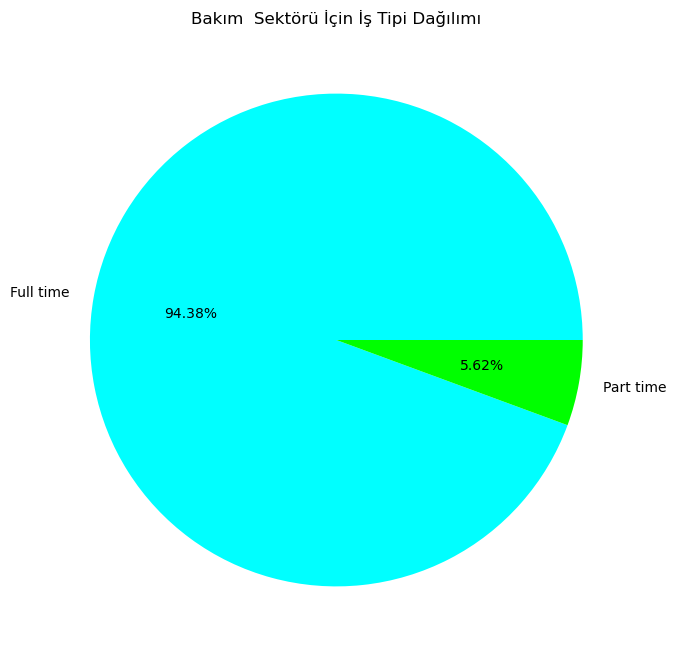

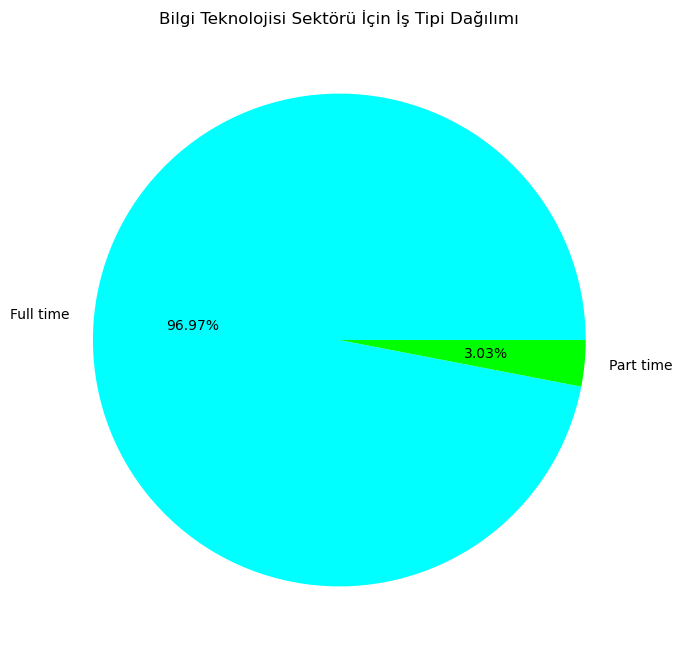

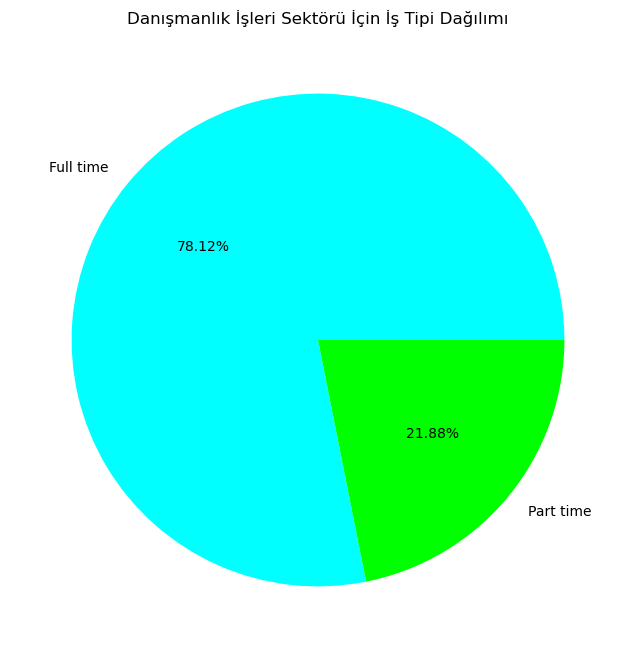

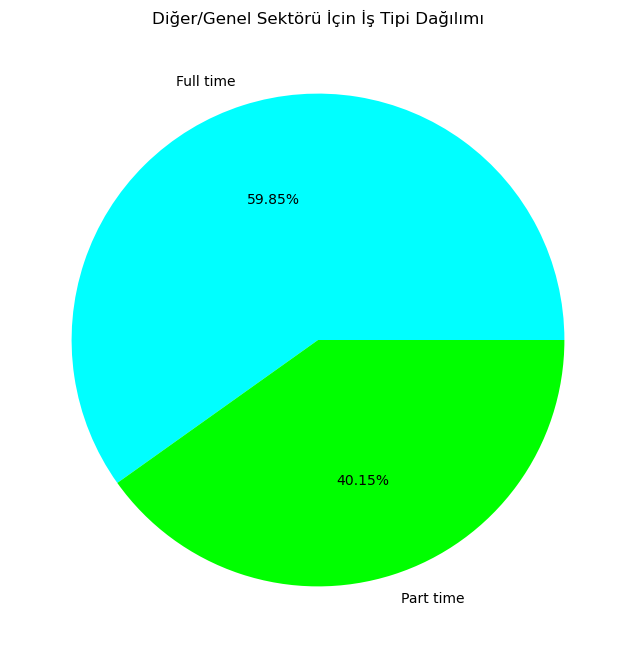

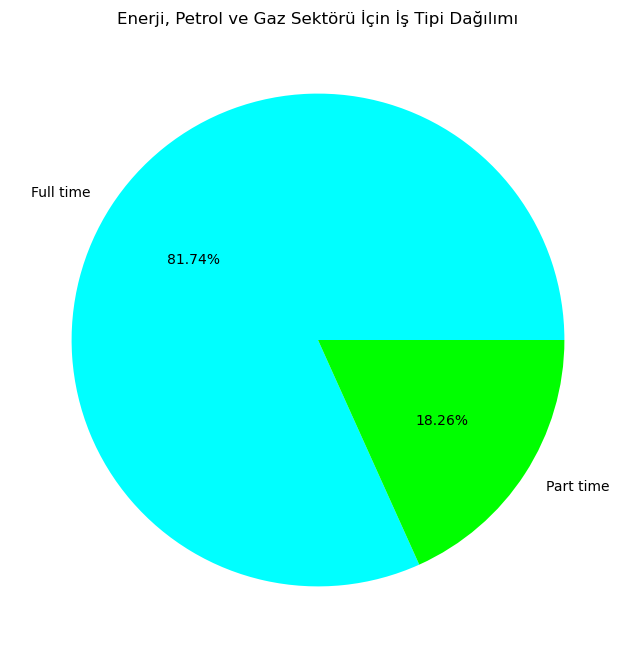

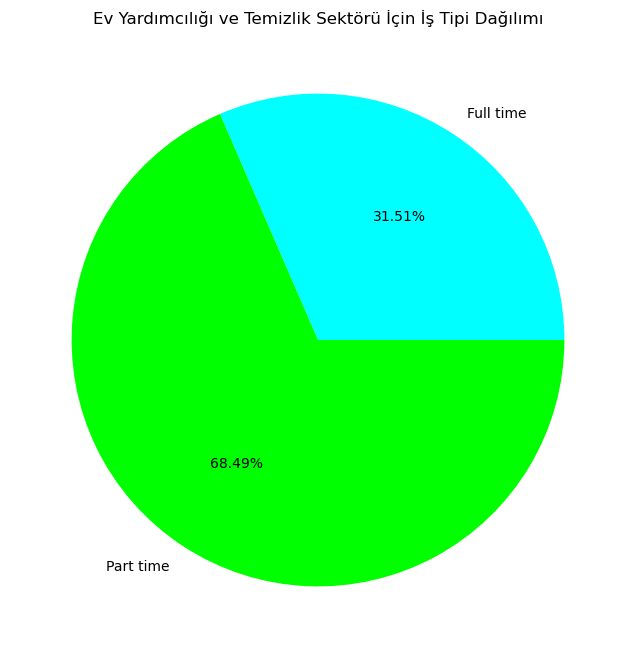

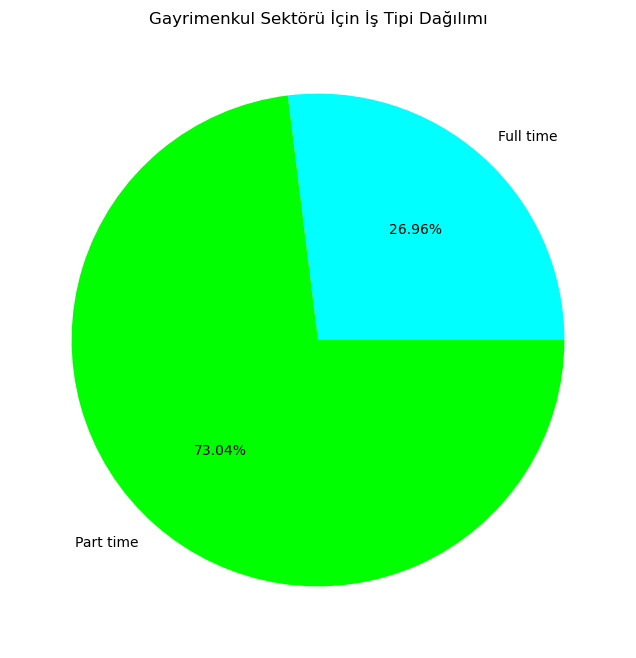

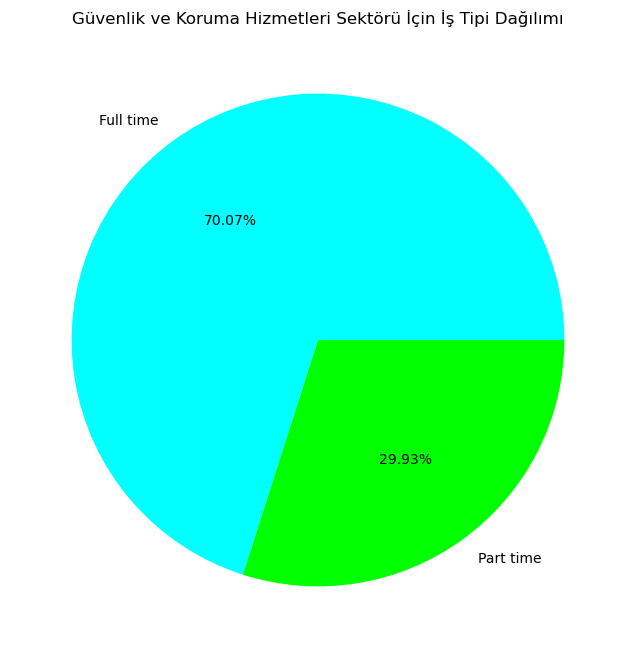

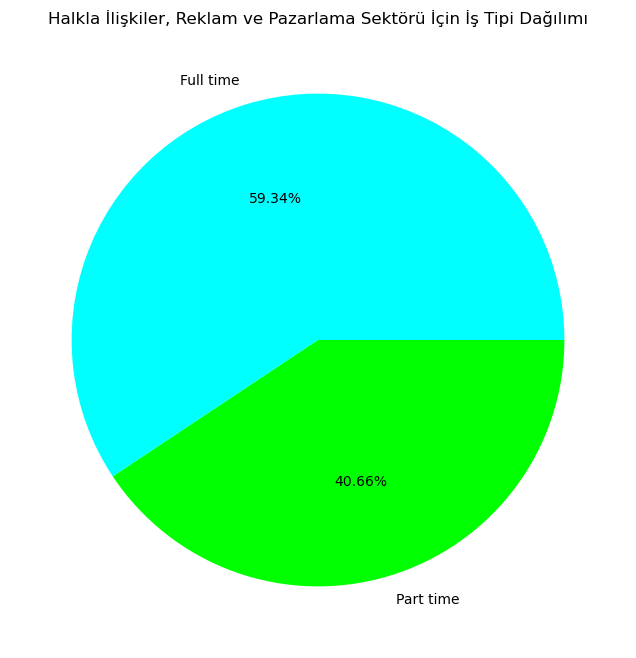

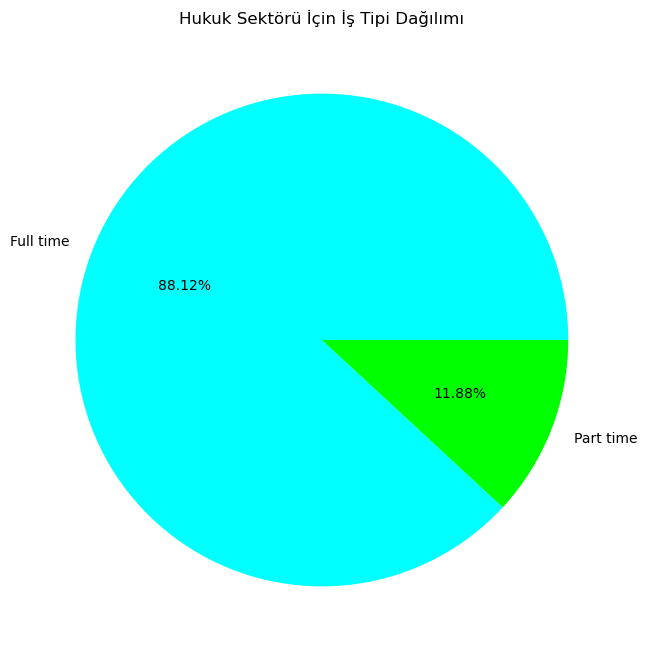

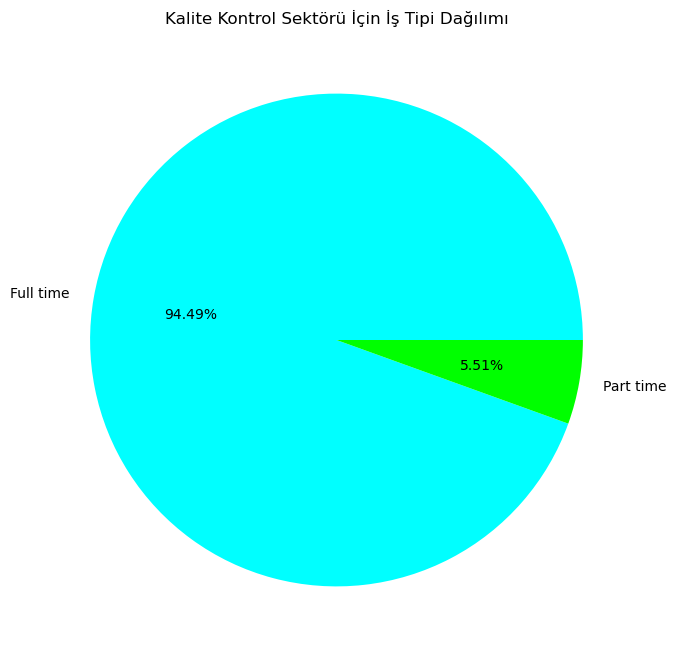

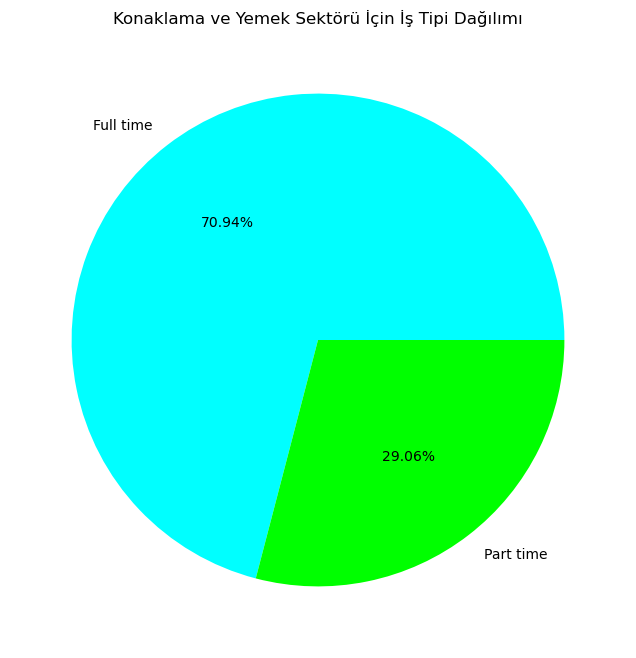

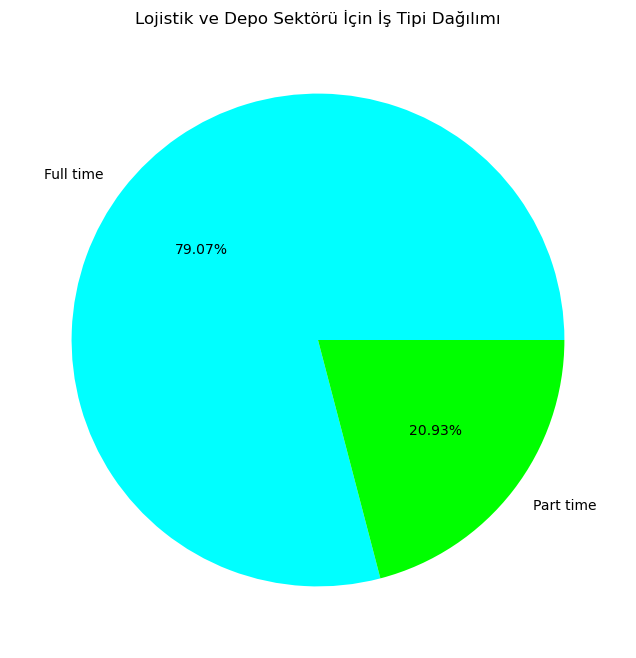

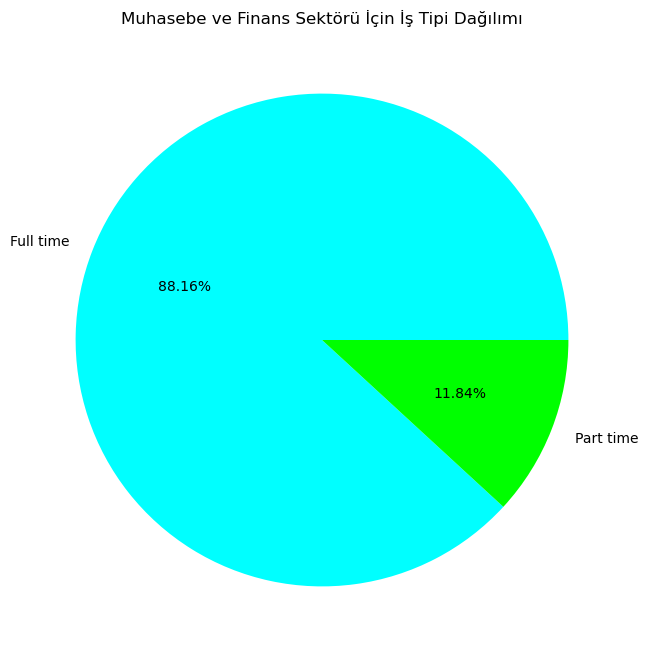

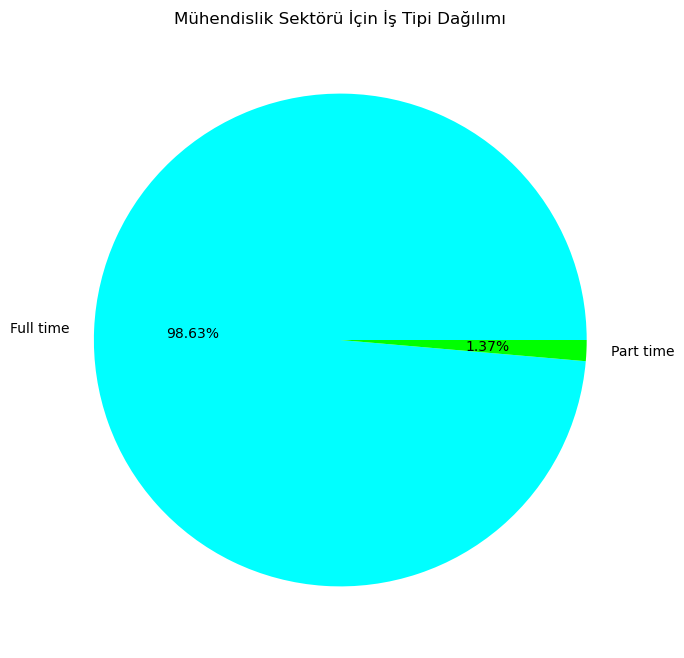

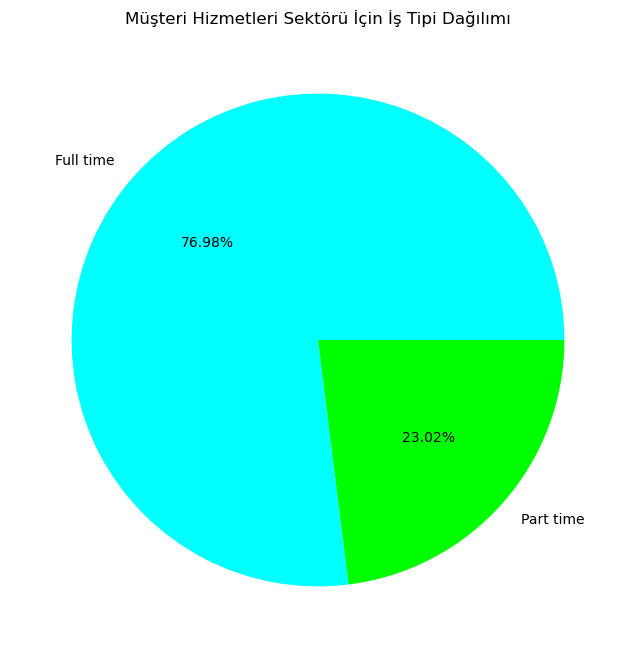

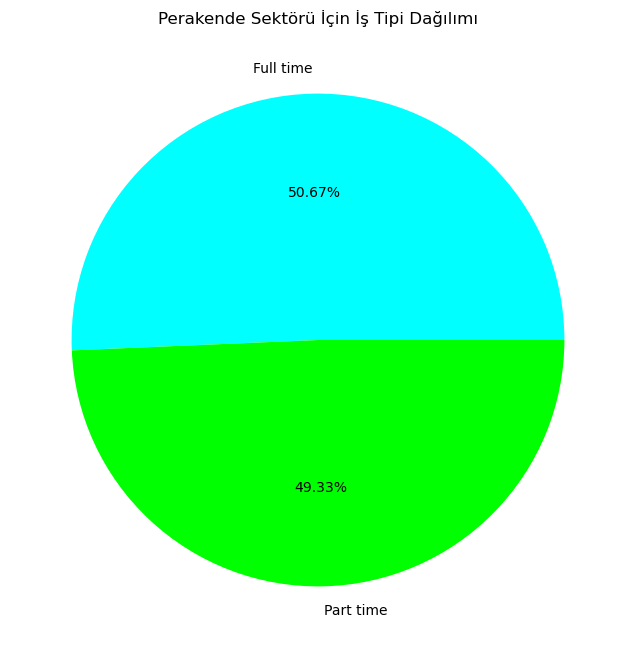

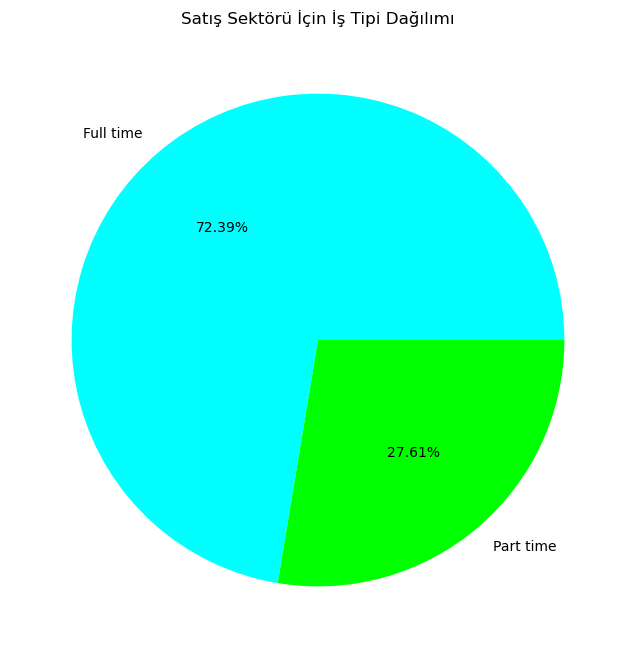

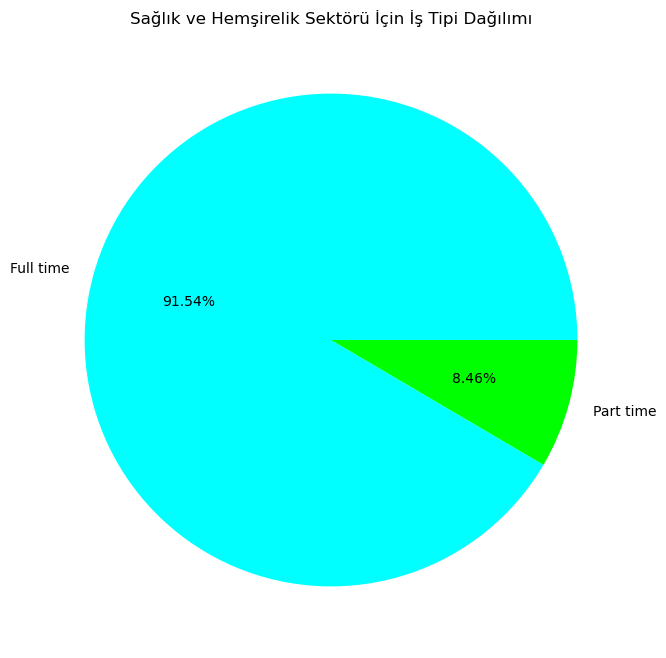

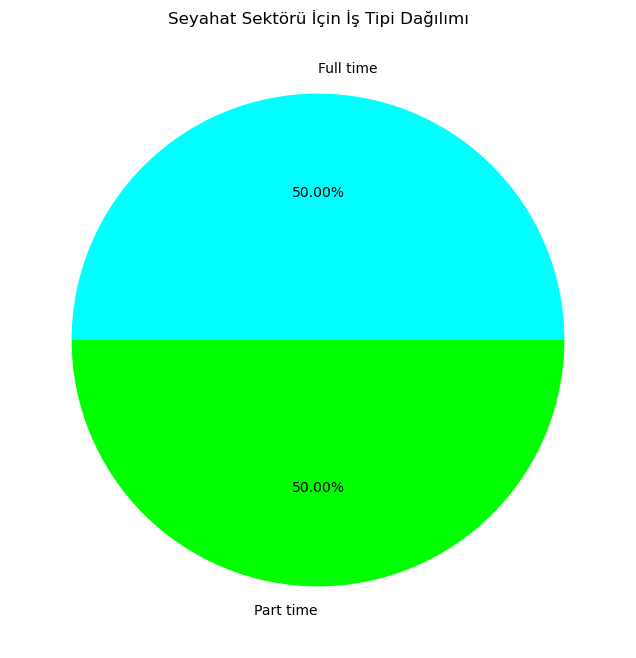

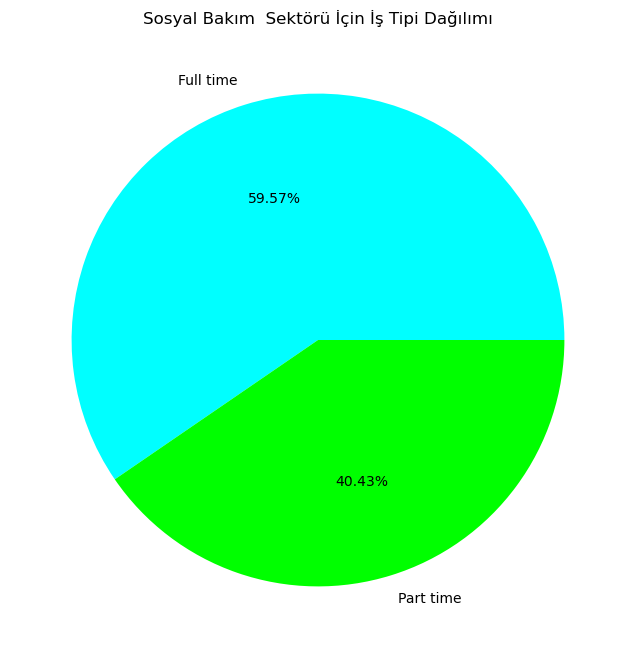

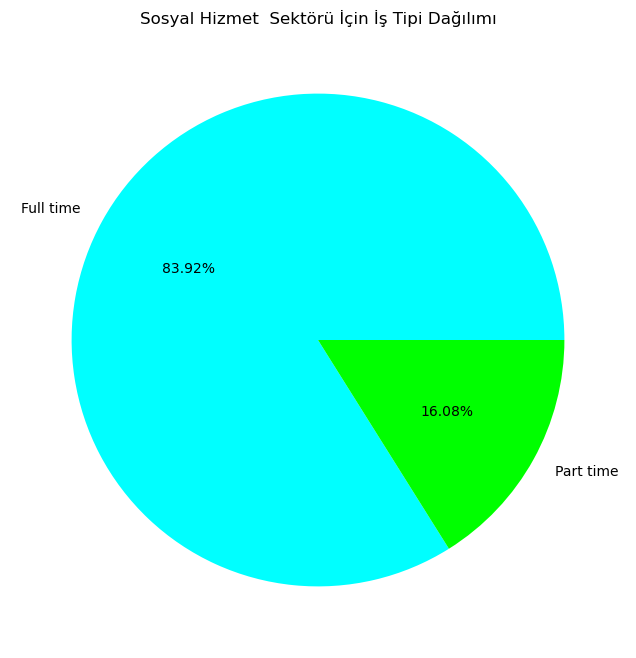

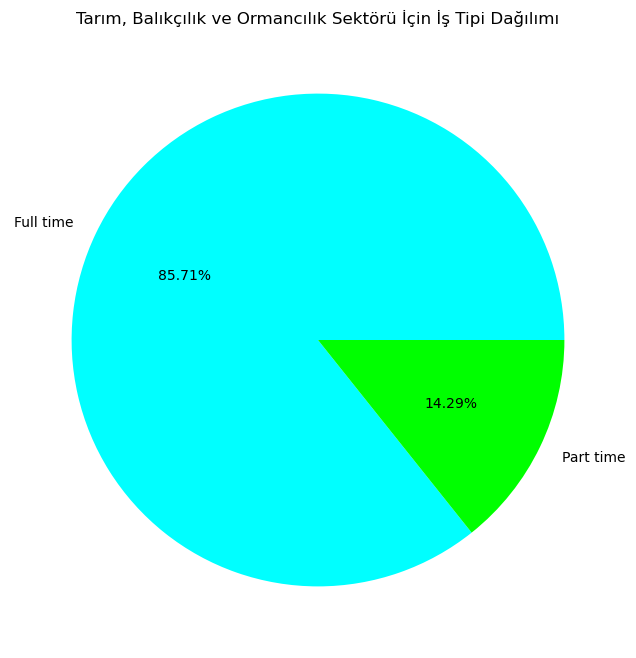

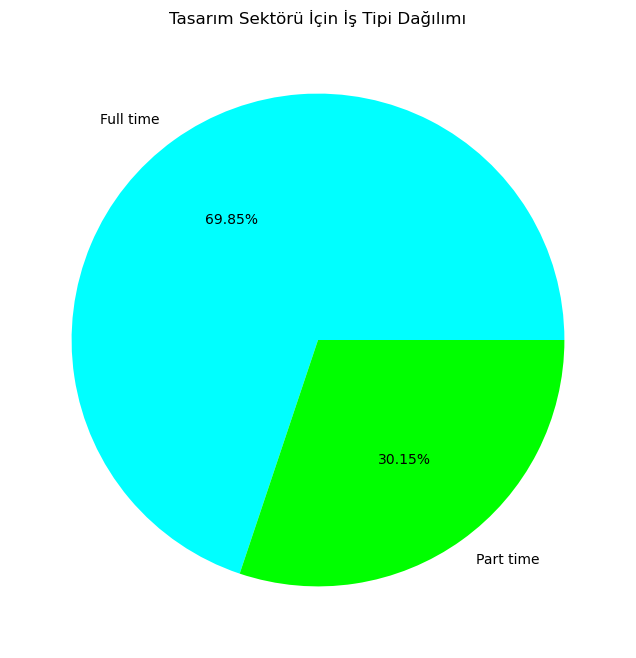

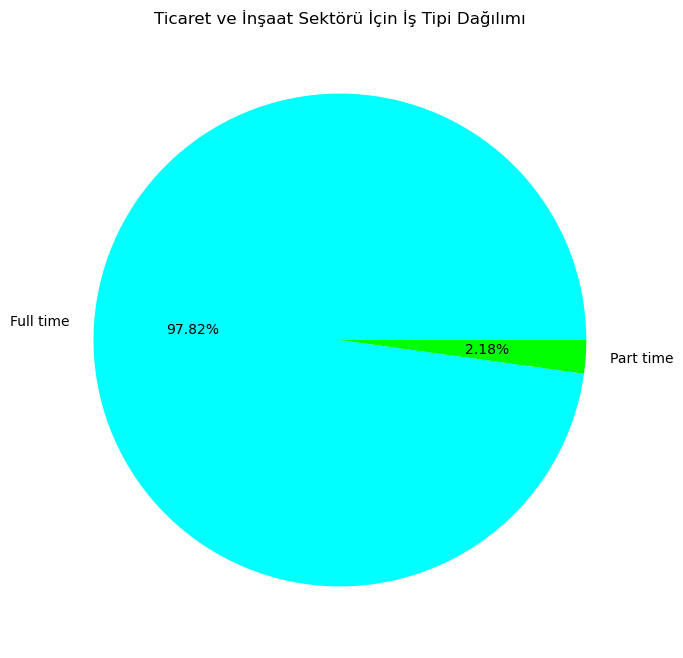

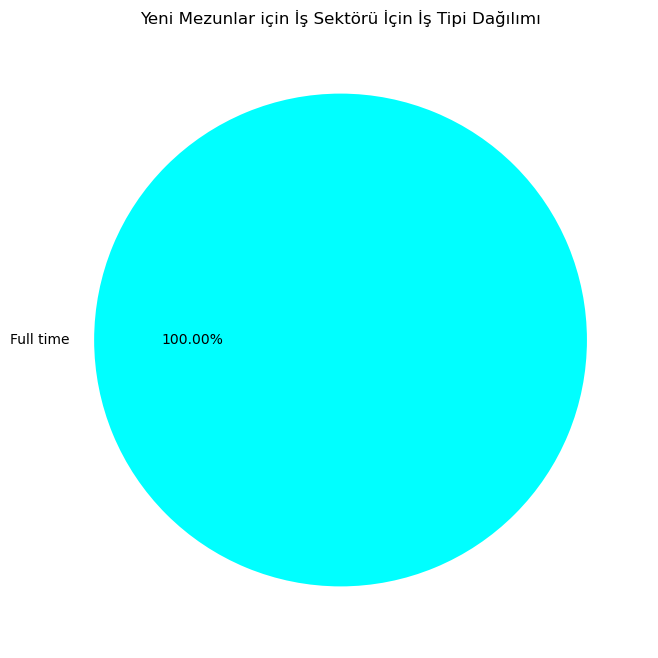

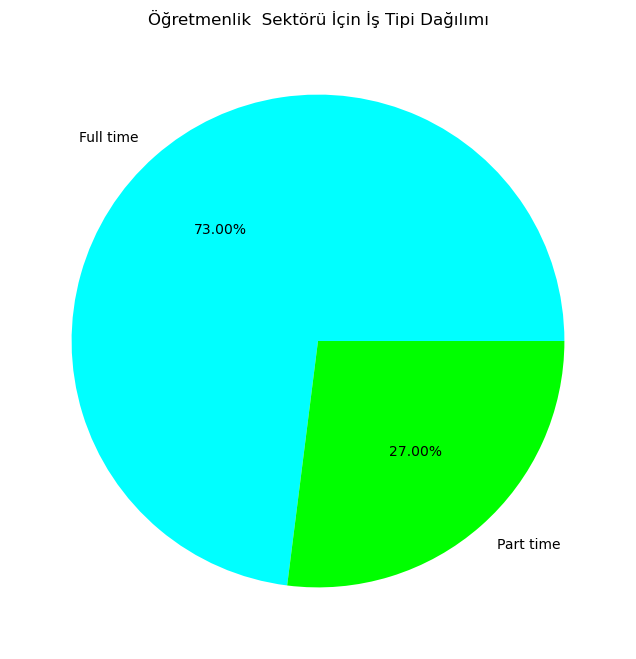

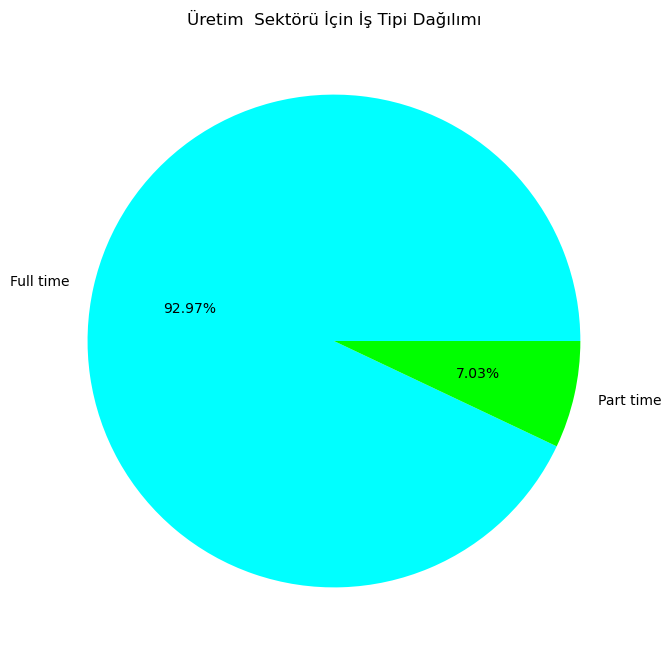

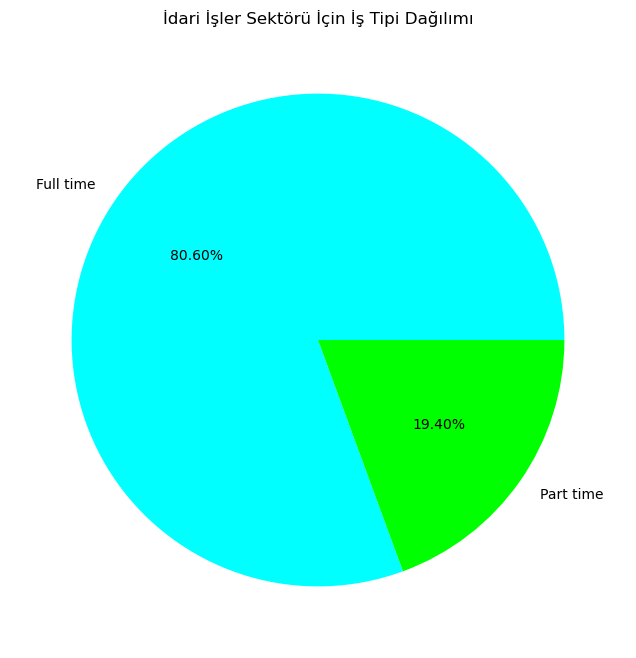

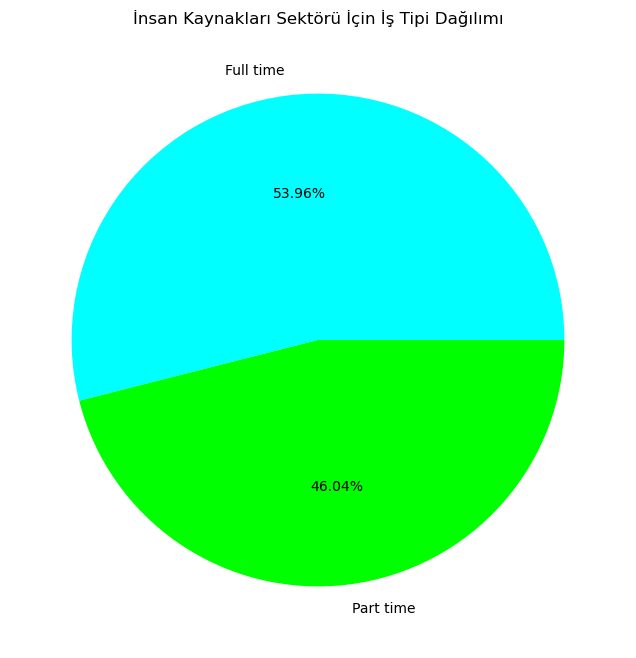

In [13]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/a90530/Downloads/akbank/modules')
from translator import CategoryTranslator

translator = CategoryTranslator("/Users/a90530/Downloads/akbank/translations.json")

#Translator modulü kullanılarak kategorilerin daha iyi anlaşılması adına çeviri işlemi
df['translated_category'] = translator.translate_categories(df, 'category')['translated_category']

hours_distribution = df.groupby(['translated_category', 'hours']).size().reset_index(name='count')

# Kategorileri bulma işlemi
categories = hours_distribution['translated_category'].unique()

# Her kategori için ayrı bir pie chart
for category in categories:
    
    category_data = hours_distribution[hours_distribution['translated_category'] == category]
    
    plt.figure(figsize=(8, 8))
    plt.pie(category_data['count'], labels=category_data['hours'], autopct='%1.2f%%', startangle=0,colors=['#00FFFF', '#00FF00'])
    plt.title(f"{category} Sektörü İçin İş Tipi Dağılımı")
    plt.show()


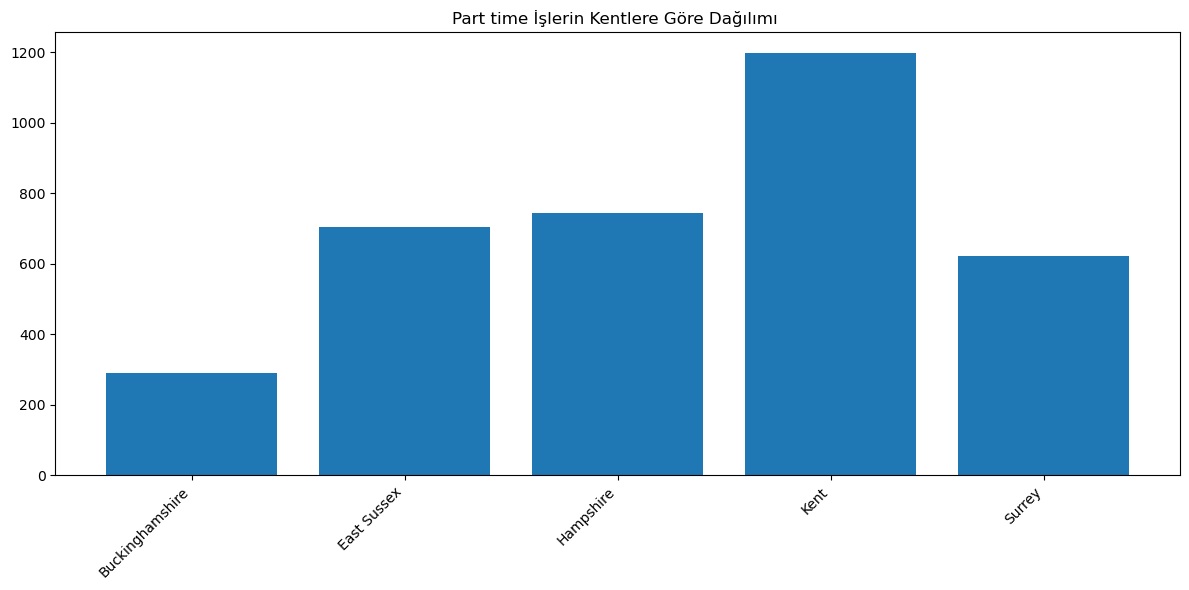

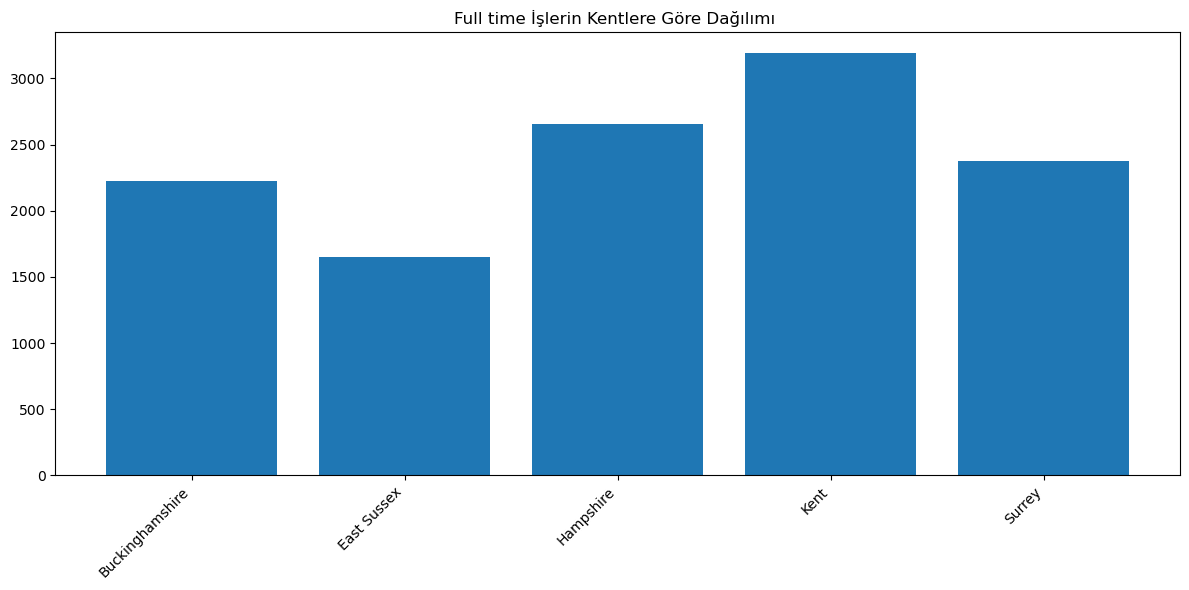

In [14]:
cities_distribution = df.groupby(['city', 'hours']).size().reset_index(name='count')

# Her bir kategori için ayrı bir plot 
for hour_category in ['Part time', 'Full time']:
    hour_category_data = cities_distribution[cities_distribution['hours'] == hour_category]
    
    plt.figure(figsize=(12, 6))
    plt.bar(hour_category_data['city'], hour_category_data['count'])
    plt.title(f"{hour_category} İşlerin Kentlere Göre Dağılımı ")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()